In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

In [2]:
train_batch_size = 100
test_batch_size = 1000

In [3]:
# load MNIST dataset

mnist_trainset = datasets.FashionMNIST(root = './data', train = True,transform = transforms.ToTensor(), download = True)
mnist_testset = datasets.FashionMNIST(root = './data', train = False,transform = transforms.ToTensor(), download = True)

In [4]:
train_loader =  torch.utils.data.DataLoader(mnist_trainset, batch_size = train_batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size = test_batch_size, shuffle = False)

In [5]:
indexLabel = ['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
example = iter(train_loader)

In [7]:
example_data, example_targets = example.next()

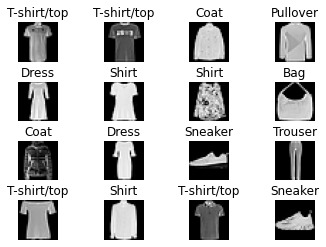

In [8]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace = 0.5,wspace=0.1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.axis('off')
    plt.title(indexLabel[example_targets[i]])
plt.show()

In [9]:
# Build a NN model

input_features = len(example_data[0][0])**2
hidden_features = 500
output_features = 10

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_features,hidden_features),
    nn.ReLU(),
    nn.Linear(hidden_features,output_features)
    )

In [10]:
# initialization

def init_wandb(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
        #nn.init.normal_(m.weight,mean=0, std=0.01)
        m.bias.data.fill_(0.00)
        
model.apply(init_wandb)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=500, bias=True)
  (2): ReLU()
  (3): Linear(in_features=500, out_features=10, bias=True)
)

In [11]:
# Hyper-Parameters

epochs = 10
lr = 0.001
momentum = 0.9

In [12]:
#define loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.parameters(), lr = lr, momentum=momentum)
optimizer = optim.Adam(model.parameters(), lr = lr)

In [13]:
# Model training

model.train()
no_batch = len(mnist_trainset)//train_batch_size
for epoch in range(epochs):
    for i,(img,label) in enumerate(train_loader):
        optimizer.zero_grad()
        predict=model(img)
        loss = loss_fn(predict,label)
        loss.backward()
        optimizer.step()
        if (i+1)% 100 == 0:
            print(f'Epoch: {epoch+1}/{epochs}, Step: {i+1}/{no_batch}, Loss: {loss.item():.4f}')

Epoch: 1/10, Step: 100/600, Loss: 0.5239
Epoch: 1/10, Step: 200/600, Loss: 0.4412
Epoch: 1/10, Step: 300/600, Loss: 0.3822
Epoch: 1/10, Step: 400/600, Loss: 0.5502
Epoch: 1/10, Step: 500/600, Loss: 0.2082
Epoch: 1/10, Step: 600/600, Loss: 0.4072
Epoch: 2/10, Step: 100/600, Loss: 0.4121
Epoch: 2/10, Step: 200/600, Loss: 0.4049
Epoch: 2/10, Step: 300/600, Loss: 0.2984
Epoch: 2/10, Step: 400/600, Loss: 0.4009
Epoch: 2/10, Step: 500/600, Loss: 0.2103
Epoch: 2/10, Step: 600/600, Loss: 0.3104
Epoch: 3/10, Step: 100/600, Loss: 0.3996
Epoch: 3/10, Step: 200/600, Loss: 0.2768
Epoch: 3/10, Step: 300/600, Loss: 0.3487
Epoch: 3/10, Step: 400/600, Loss: 0.3687
Epoch: 3/10, Step: 500/600, Loss: 0.4196
Epoch: 3/10, Step: 600/600, Loss: 0.4775
Epoch: 4/10, Step: 100/600, Loss: 0.2844
Epoch: 4/10, Step: 200/600, Loss: 0.3501
Epoch: 4/10, Step: 300/600, Loss: 0.3349
Epoch: 4/10, Step: 400/600, Loss: 0.2341
Epoch: 4/10, Step: 500/600, Loss: 0.2715
Epoch: 4/10, Step: 600/600, Loss: 0.2831
Epoch: 5/10, Ste

In [14]:
# Model evaluation

model.eval()
n_correct = 0
n_samples = 0
n_class_correct = [0]*10
n_class_samples = [0]*10
for img,label in test_loader:
    predict = model(img)
    _,num_predict = torch.max(predict,1)
    n_correct_batch = (num_predict==label).sum().item()
    n_samples += test_batch_size
    n_correct += n_correct_batch
    for i in range(test_batch_size):
        n_class_samples[label[i]] += 1
        if label[i] == num_predict[i]:
            n_class_correct[label[i]] += 1
    print(f'Test batch accuracy: {n_correct_batch/test_batch_size*100:.2f}% , Accumulated accuracy: {n_correct/n_samples*100:.2f}%')
print(f'Total accuracy: {n_correct/n_samples*100:.2f}%')
for i in range(10):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {indexLabel[i]:<12}: {acc} %')

Test batch accuracy: 89.40% , Accumulated accuracy: 89.40%
Test batch accuracy: 89.90% , Accumulated accuracy: 89.65%
Test batch accuracy: 88.00% , Accumulated accuracy: 89.10%
Test batch accuracy: 87.20% , Accumulated accuracy: 88.62%
Test batch accuracy: 88.70% , Accumulated accuracy: 88.64%
Test batch accuracy: 87.40% , Accumulated accuracy: 88.43%
Test batch accuracy: 89.30% , Accumulated accuracy: 88.56%
Test batch accuracy: 90.90% , Accumulated accuracy: 88.85%
Test batch accuracy: 89.50% , Accumulated accuracy: 88.92%
Test batch accuracy: 89.00% , Accumulated accuracy: 88.93%
Total accuracy: 88.93%
Accuracy of T-shirt/top : 86.6 %
Accuracy of Trouser     : 97.0 %
Accuracy of Pullover    : 80.0 %
Accuracy of Dress       : 91.6 %
Accuracy of Coat        : 83.4 %
Accuracy of Sandal      : 97.8 %
Accuracy of Shirt       : 66.9 %
Accuracy of Sneaker     : 96.5 %
Accuracy of Bag         : 96.2 %
Accuracy of Ankle boot  : 93.3 %
